# *Weather* or Not: The impact of climate and temperature on Covid-19 

# Overview

Our research analyzes whether counties with lower temperature climates experienced a steeper spike in number of coronavirus cases compared to counties with higher temperature climates. We narrowed our focus to analyze the following variables: the cases per population, average temperature of the county, and the month. Initial analysis did not support a strong correlation between the cases per population and the mean temperature and month. Regression analysis emphasized this initial analysis and further revealed that it is likely that another variable, or variables, are present with a stronger correlation to the cases per population. 

# Names

- Brandon Wettenstein
- Lillian Wood 
- Timothy Tran 
- Shehnaya Johal

<a id='research_question'></a>
# Research Question

Do counties with lower temperature climates experience a steeper spike in the number of coronavirus cases compared to counties with relatively higher temperatures across the US?
 

<a id='background'></a>

## Background & Prior Work

As cases of the COVID-19 virus are still on the rise, many studies have focused on various possibilities to slow the spread of COVID-19, and conversely, what factors could make cases skyrocket. Multiple studies, articles, and other publications have been directed toward the impact of weather on COVID-19 cases. 

A quick search on the internet returns multiple articles from sources such as National Geographic, PBS, and Forbes. Aside from actual research papers, many Americans may turn to these sources for what they believe to be accurate information. This becomes a concern since Americans may be receiving inaccurate or exaggerated predictions. As the CDC website states under Frequently Asked Questions, “It is not yet known whether weather and temperature affect the spread of COVID-19” (CDC). National Geographic (Kossakovski, 2020) and PBS (Associated Press, 2020) both claim that colder weather may lead to an increase in COVID-19 cases due to either a weakened immune system during colder months or colder weather forcing people into enclosed areas with other people. Going more locally, Sharp San Diego’s website also includes its own article stating that staying in enclosed spaces with other people due to weather conditions may cause an increase in COVID-19 cases (What cold weather means for COVID-19, 2020). However, the consensus on whether or not climate and weather actually impact the rise in cases is not clear. Forbes is one source which actually notes the current contradiction in multiple current research studies (Foerster, 2021). 

Analyzing the current research, even the reputable research studies done on climate and weather impacts on COVID-19 seem to clash. In October 2020, the study, “Association between weather data and COVID-19 pandemic predicting mortality rate: Machine learning approaches,” predicted a positive association between weather and COVID-19 mortality rate (Malki et al., 2020, 110137). The algorithms and regression models employed in this study showed that high temperatures and humidity correlate to a lower COVID-19 mortality rate. The researchers conclude that higher temperatures would therefore lower the number of infections (Malki et al., 2020, 110137). 

However, many recent studies support that climate and weather do not have an impact on the trend in COVID-19 cases. In “Is the transmission of novel coronavirus disease (COVID-19) weather dependent?”, a Letter to the Editor of the “Journal of the Air & Waste Management Association,” researchers from around the globe inform that  although the initial spread occurred faster in colder countries, this may be due to other variables such as population density, public health facilities, policies, etc (Sahoo et al., 2020, 1063). These earlier studies found that humidity and high temperatures decreased the number of COVID-19 cases, yet later studies towards the end of 2020 find weak to no correlation (Sahoo et al., 2020, 1061). This comprehensive letter and review of numerous research studies adds much support that there is no correlation between climate and weather on COVID-19 cases. However, the letter also concludes that more research must be done.

Because of this continued uncertainty, our project aims to further explore the relationship of climate and weather on COVID-19 cases to determine whether there is support for a positive correlation, or if there is in fact no correlation.

1) Associated Press. (2020, November 3). Does weather affect the spread of the coronavirus 
Outside?pbs.org.https://www.pbs.org/newshour/health/does-weather-affect-the-spread-of-the-coronavirus-outside

2) FAQ. (2021, March 1). CDC.gov. https://www.cdc.gov/coronavirus/2019-ncov/faq.html

3) Foerster, J. (2021, February 22). Does Weather Play A Role In Covid-19 Prediction? 
Frobes.com.https://www.forbes.com/sites/jimfoerster/2021/02/22/does-weather-play-a-role-in-covid-prediction/?sh=7e5dddd0171c

4) Kossakovski, F. (2020, December 15). Why cold weather makes it harder for the body to fight 
respiratory infections. NationalGeographic.com.
https://www.nationalgeographic.com/science/article/coronavirus-why-cold-winter-weather-makes-it-harder-to-fight-respiratory-infections

5) Prafulla Kumar Sahoo , Mike A. Powell , Sunil Mittal & V.K. Garg (2020) Is the transmission of 
novel coronavirus disease (COVID-19) weather dependent?, Journal of the Air & Waste 
Management Association, 70:11, 1061-1064, DOI: 10.1080/10962247.2020.1823763

6) What cold weather means for COVID-19. (2020, November 24).Sharp.com.https://www.sharp.com/health-news/what-cold-weather-means-for-covid-19.cfm

7) Zohair Malki, El-Sayed Atlam, Aboul Ella Hassanien, Guesh Dagnew, Mostafa A. Elhosseini, 
Ibrahim Gad (2020), Association between weather data and COVID-19 pandemic predicting mortality rate: Machine learning approaches, Chaos, Solitons & Fractals, Volume 138, 2020, 110137, ISSN 0960-0779, https://doi.org/10.1016/j.chaos.2020.110137. (https://www.sciencedirect.com/science/article/pii/S0960077920305336)

# Hypothesis


We predict that colder year-round climate and low temperatures during the coldest months of the year do not have a significant impact on the rise in COVID-19 cases by U.S. county. Our reasoning is based on the prior scientific research that has been done, which stipulates that colder climates do not have a positive correlation with COVID-19 cases, and that any positive correlation is most likely due to a third or multiple other variables.

# Dataset(s)


- Dataset Name: US Counties: COVID19 + Weather + Socio/Health data
- Link to the dataset: https://www.kaggle.com/johnjdavisiv/us-counties-covid19-weather-sociohealth-data 
- Number of observations: 6 (Date, county, state, mean_temp, cases, deaths)

The dataset describes Covid-19 deaths and cases per county in the United States from January 21, 2020 to December 3, 2020. It also holds demographic and weather data for each day and county along with socioeconomic and health demographics for each of the 3,142 counties in the US.


# Setup

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import patsy
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skewnorm

#improve resolution
%config InlineBackend.figure_format ='retina'

df = pd.read_csv('/Users/lillysmacxd/Desktop/US_counties_COVID19_health_weather_data.csv')

# Data Cleaning

Describe your data cleaning steps here.

In [4]:
df = df[['date', 'county', 'state', 'mean_temp', 'cases', 'deaths', 'total_population']]

# To get the month in numeric form so we can do easier comparisons
date = pd.to_datetime(df.date).dt.month
df['month'] = date

# Filter by the numeric month, in this case April because the Covid situation was known in the US by April
filtered_data = df.loc[df['month'] >= 4] 

# Filter counties based on population size. Selected two most populous counties for each climate zone
# Los Angeles and Maricopa represent Dry Climate, Cook and Harris represent Moist subtropical Mid-Latitude Climate, and Wayne and King represent Moist Continental Mid-Latitude Climate
filtered_data = filtered_data.loc[(filtered_data['county'] == 'Los Angeles') | (filtered_data['county'] == 'Maricopa') | ((filtered_data['county'] == 'Cook') & (filtered_data['state'] == 'Illinois')) | ((filtered_data['county'] == 'Harris') & (filtered_data['state'] == 'Texas')) | ((filtered_data['county'] == 'Wayne') & (filtered_data['state'] == 'Michigan')) | (filtered_data['county'] == 'King')]

# Sorts the values by county and date so we can see the daily temperature/cases/deaths per county
filtered_data = filtered_data.sort_values(by=['date', 'county'], ascending=True)

filtered_data['cases_pop'] = filtered_data['cases'] / filtered_data['total_population']

# Multiply it by 100 to get a cleaner percentage of the number of cases present per member of the population
filtered_data['cases_pop'] = filtered_data['cases_pop'].multiply(100)

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

We looked at cases per day, per county. When looking at the columns for outliers, the data does seem to be pretty consistent other than the cases column where the mean doesn’t seem to be close to the value at 50%, like it does in the remainder of the columns, so we should investigate it further. Additionally, it shows that we're dealing with tabular data because the dataset displays observations in rows and variables in columns. This is group level data because it represents data at the county level. We also note that the mean_temp 'count' is 28 less than the count in the cases, deaths, total_population, month, and cases_pop column. This indicates that there are 28 temperature data entrires that are invalid. 


In [5]:
filtered_data.describe()

,mean_temp,cases,deaths,total_population,month,cases_pop
count,1513.000000,1541.000000,1541.000000,1.541000e+03,1541.000000,1541.000000
mean,69.630866,82827.037638,2459.622323,4.450600e+06,7.680727,1.717679
std,16.007446,87232.902967,2017.360332,2.815418e+06,2.368752,1.311699
min,26.500000,1.000000,0.000000,2.740000e+02,4.000000,0.019101
25%,58.600000,16157.000000,620.000000,2.079550e+06,6.000000,0.518670
50%,70.700000,40919.000000,2470.000000,4.088549e+06,8.000000,1.481450
75%,80.600000,136246.000000,3534.000000,5.227575e+06,10.000000,2.650866
max,108.400000,430713.000000,7842.000000,1.005716e+07,12.000000,6.161978


# Temporality 

Before our datacleaning, our dataset displayed data in terms of year, month, day in the format YYYY-MM-DD. We simplified this and made it so that the data was temporally situated in terms of its numeric month. 

# Checking the null values

When we check the dataset for null values, we find that there are 28 columns with no data in them. Specifically, there are 28 columns where the mean_temp has no actual value. Because leaving this in would only give us the number of cases and no temperature to compare them too, we drop these columns. Running 'describe' on the dataset shows that the count for each piece of data in the rows are even across the board, at 1513. 

In [6]:
null_rows = filtered_data.isnull().any(axis=1)

print(filtered_data[null_rows], len(filtered_data[null_rows]))

filtered_data = filtered_data.dropna()

filtered_data.describe()

              date       county       state  mean_temp   cases  deaths  \
88742   2020-04-26     Maricopa     Arizona        NaN    3359   122.0   
91538   2020-04-27     Maricopa     Arizona        NaN    3457   122.0   
97160   2020-04-29     Maricopa     Arizona        NaN    3723   140.0   
99985   2020-04-30     Maricopa     Arizona        NaN    3972   145.0   
126089  2020-05-09  Los Angeles  California        NaN   31197  1512.0   
129052  2020-05-10  Los Angeles  California        NaN   31677  1530.0   
132018  2020-05-11  Los Angeles  California        NaN   32258  1569.0   
417746  2020-08-11     Maricopa     Arizona        NaN  126791  2382.0   
581366  2020-10-01  Los Angeles  California        NaN  271371  6610.0   
581265  2020-10-01     Maricopa     Arizona        NaN  142287  3405.0   
584579  2020-10-02  Los Angeles  California        NaN  272653  6626.0   
584478  2020-10-02     Maricopa     Arizona        NaN  142566  3416.0   
587691  2020-10-03     Maricopa     Ar

,mean_temp,cases,deaths,total_population,month,cases_pop
count,1513.000000,1513.000000,1513.000000,1.513000e+03,1513.000000,1513.000000
mean,69.630866,80523.198282,2425.366821,4.413598e+06,7.647720,1.689526
std,16.007446,83941.398871,1983.254653,2.797781e+06,2.340866,1.274322
min,26.500000,1.000000,0.000000,2.740000e+02,4.000000,0.019101
25%,58.600000,15965.000000,617.000000,2.079550e+06,6.000000,0.519749
50%,70.700000,40084.000000,2449.000000,4.088549e+06,8.000000,1.463490
75%,80.600000,134346.000000,3487.000000,5.227575e+06,10.000000,2.595659
max,108.400000,401034.000000,7655.000000,1.005716e+07,12.000000,5.860633


# Comparing Means

We split the data into three subsets, each including the data for two counties based on climate zone. The three resulting datasets were continental_df (Moist Continental Mid-Latitude Climates), subtropic_df (Moist Subtropical Mid-Latitude Climates), and dry_df (Dry Climates). 

We compared the mean cases per population (cases_pop) and the mean temperature (mean_temp) of each climate zone during April-December 2020. There does seem to be slight differences in cases per population. There is a difference between the cooler Moist Continental Mid-Latitude Climate and the warmer Moist Subtropical Mid-Latitude Climate and Dry Climate. However, it is not certain whether this is a significant difference. Additionally, there is not a very large difference between Moist Subtropical Mid-Latitude Climates and Dry Climates, and these means do not show evidence suggesting a positive correlation. 

Further analysis is needed to explore if there is in fact a correlation between temperature and cases per population.

In [7]:
# comparing mean cases to mean temp for Moist Continental Mid-Latitude Climates.
continental_df = filtered_data[(filtered_data['county'] == 'Wayne') | (filtered_data['county'] == 'King')]
continental_df['cases_pop'].mean(), continental_df['mean_temp'].mean()

(1.1656562266954638, 58.8702554744526)

In [8]:
# comparing mean cases to mean temp # for Moist Subtropical Mid-Latitude Climates.
subtropic_df = filtered_data[(filtered_data['county'] == 'Cook') | (filtered_data['county'] == 'Harris')]
subtropic_df['cases_pop'].mean(), subtropic_df['mean_temp'].mean()

(2.0150677878030434, 69.80528455284555)

In [9]:
# comparing mean cases to mean temp for Dry Climates.
dry_df = filtered_data[(filtered_data['county'] == 'Los Angeles') | (filtered_data['county'] == 'Maricopa')]
dry_df['cases_pop'].mean(), dry_df['mean_temp'].mean()

(1.9578442501104312, 81.9162790697675)

# Relationship between variables?

For each county, to see the distribution of cases per member of the county's population, we plotted a histogram along with a density estimate in order to see the range of infected members of the population. We then wanted to see if the min and max of cases in the population could be attributed to the temperature in that population. Hence, we used a scatter plot to find out. Ultimately, it appears that there was no correlation between the magnitude of infected people in the county population and the average temperature. A regression analysis could be used to see if there's an actual relationship between the degrees of temperature in the county with the county's magnitude of infected. There could also be a 3rd variable we aren't analyzing that's preventing us from seeing a true correlation. 

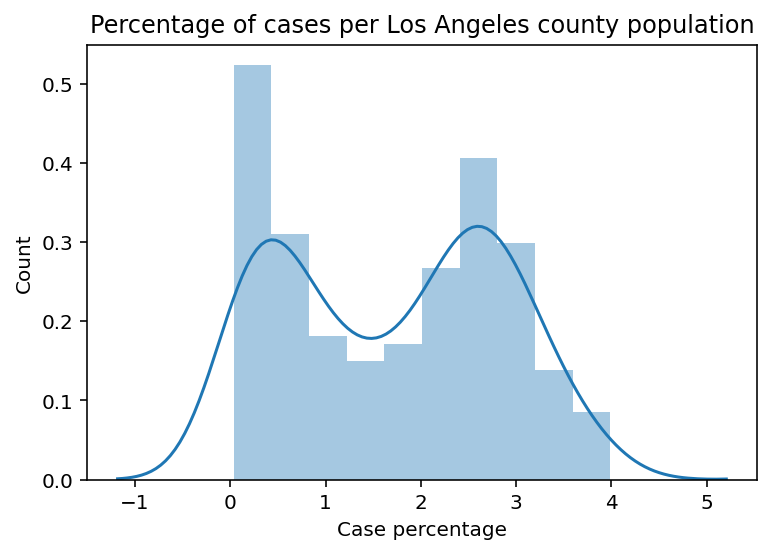

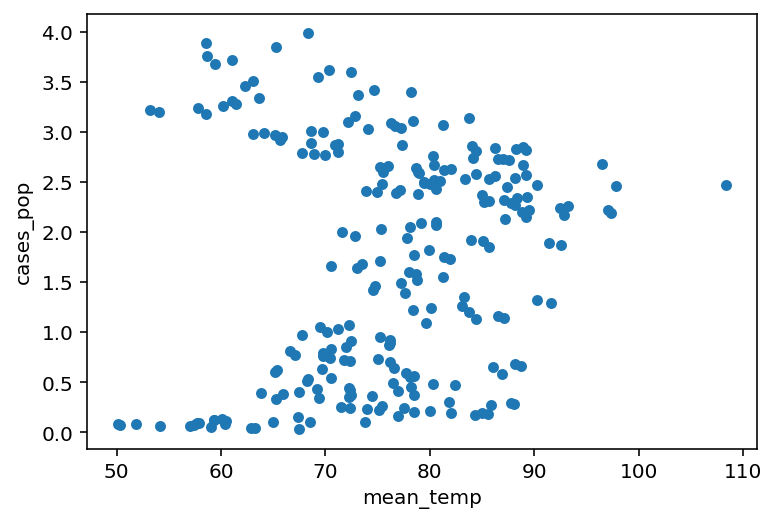

In [10]:
# Dry climates
los_angeles = filtered_data.loc[(filtered_data['county'] == 'Los Angeles')]

plot = sns.distplot(los_angeles['cases_pop'], bins=10, hist=True)
plot.set(xlabel='Case percentage', ylabel='Count')
plot.set_title('Percentage of cases per Los Angeles county population')

los_angeles.plot.scatter(x='mean_temp', y='cases_pop')

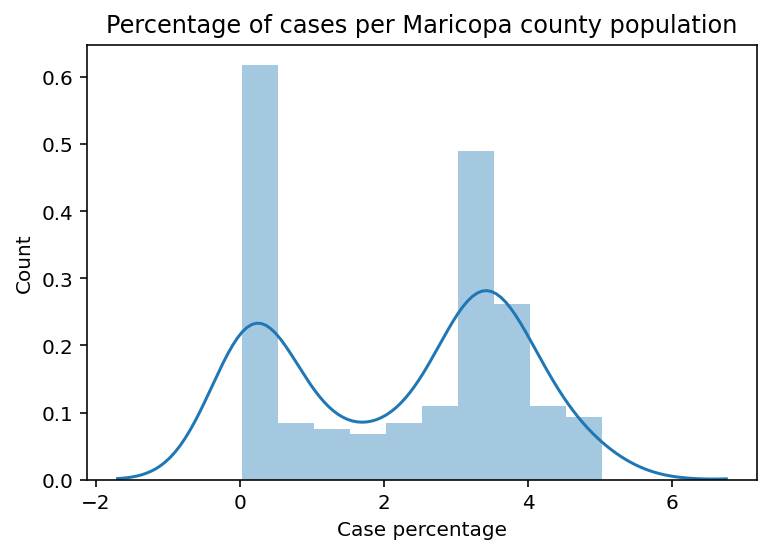

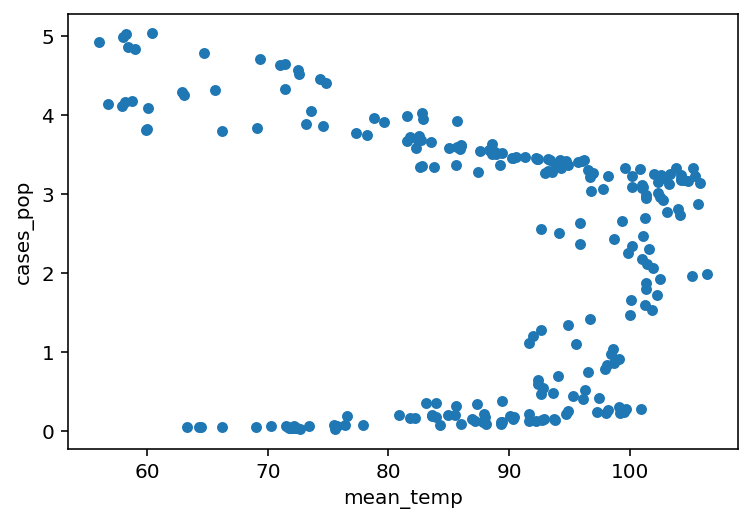

In [11]:
# Dry climates
maricopa_county = filtered_data.loc[(filtered_data['county'] == 'Maricopa')]

plot = sns.distplot(maricopa_county['cases_pop'], bins=10, hist=True)
plot.set(xlabel='Case percentage', ylabel='Count')
plot.set_title('Percentage of cases per Maricopa county population')

maricopa_county.plot.scatter(x='mean_temp', y='cases_pop')


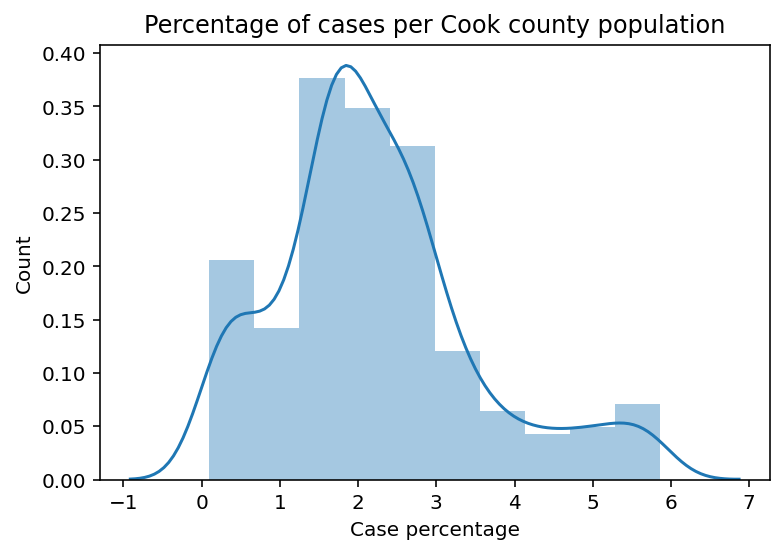

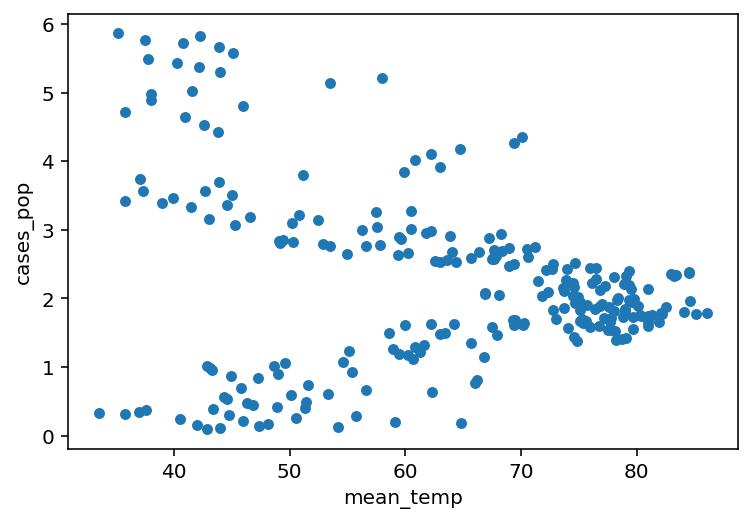

In [12]:
# Moist subtropical Mid-Latitude Climates
cook_county = filtered_data.loc[(filtered_data['county'] == 'Cook')]

plot = sns.distplot(cook_county['cases_pop'], bins=10, hist=True)
plot.set(xlabel='Case percentage', ylabel='Count')
plot.set_title('Percentage of cases per Cook county population')

cook_county.plot.scatter(x='mean_temp', y='cases_pop')

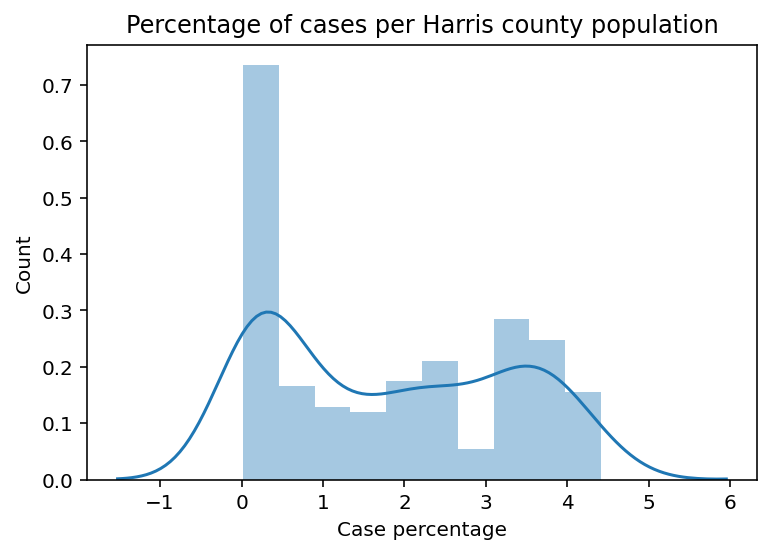

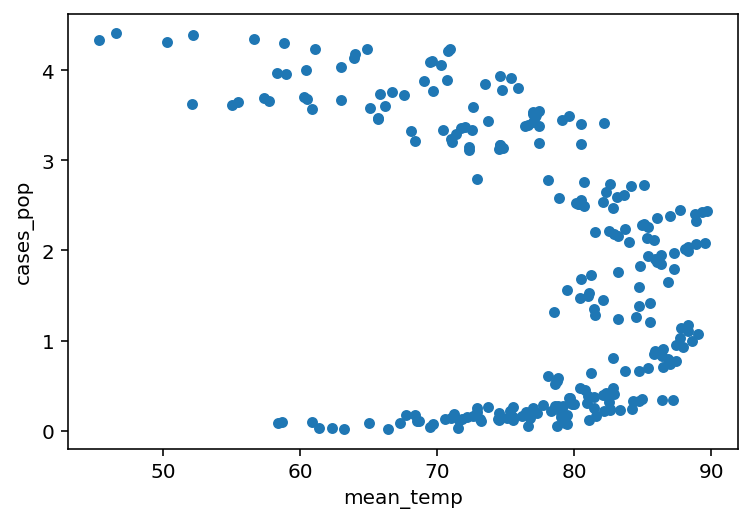

In [13]:
# Moist subtropical Mid-Latitude Climates
harris_county = filtered_data.loc[(filtered_data['county'] == 'Harris')]

plot = sns.distplot(harris_county['cases_pop'], bins=10, hist=True)
plot.set(xlabel='Case percentage', ylabel='Count')
plot.set_title('Percentage of cases per Harris county population')

harris_county.plot.scatter(x='mean_temp', y='cases_pop')

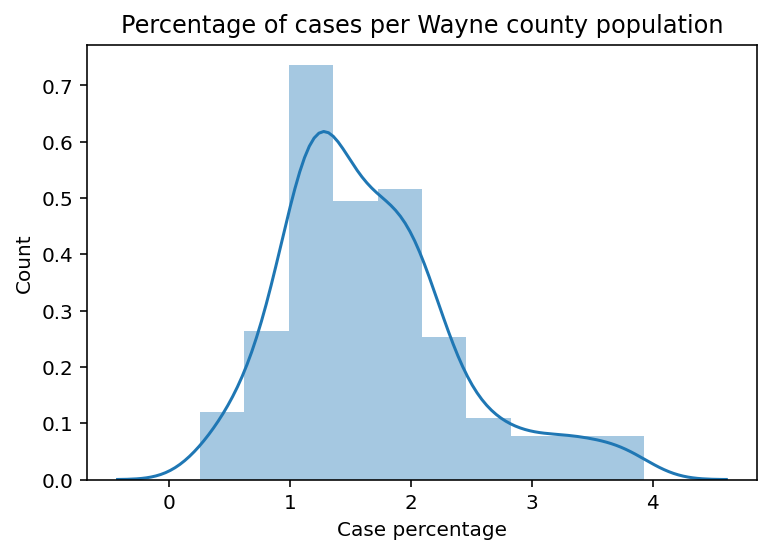

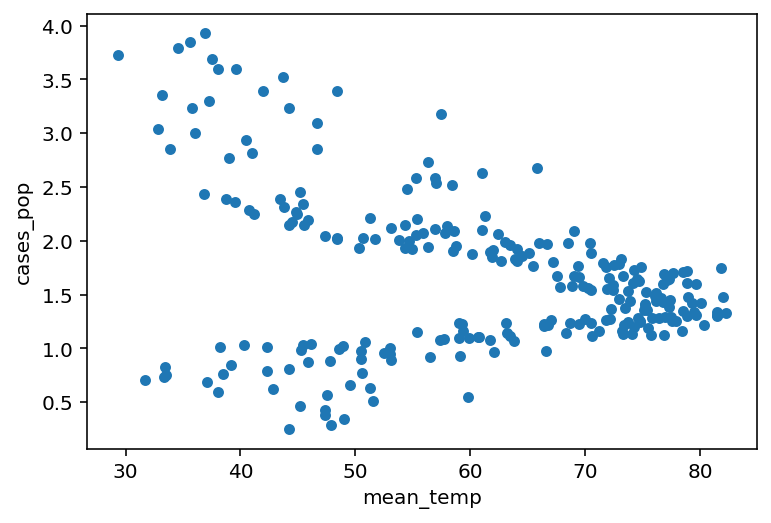

In [14]:
# Moist Continental Mid-Latitude Climates
wayne_county = filtered_data.loc[(filtered_data['county'] == 'Wayne')]

plot = sns.distplot(wayne_county['cases_pop'], bins=10, hist=True)
plot.set(xlabel='Case percentage', ylabel='Count')
plot.set_title('Percentage of cases per Wayne county population')

wayne_county.plot.scatter(x='mean_temp', y='cases_pop')

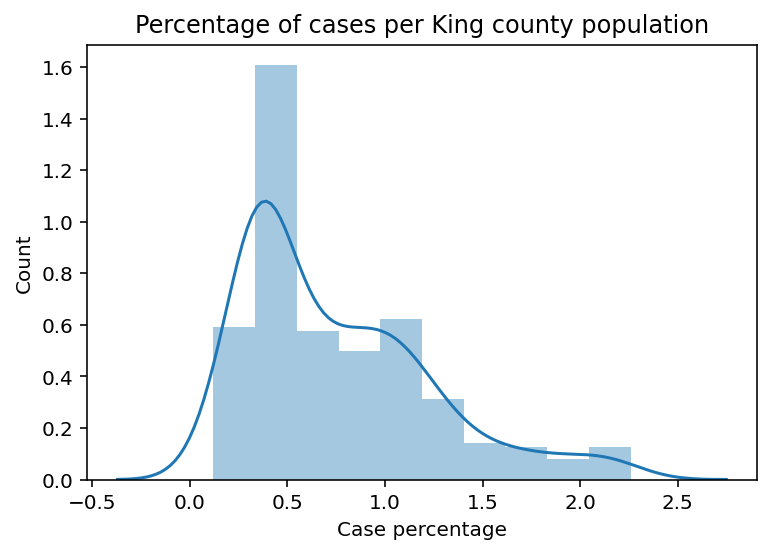

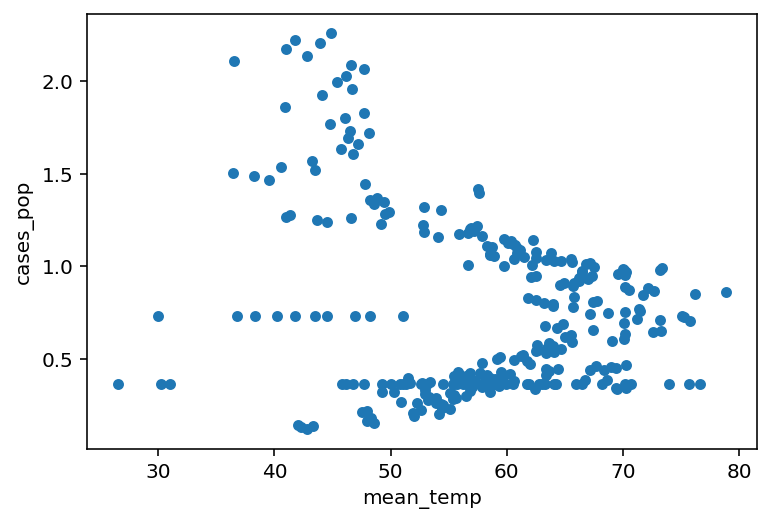

In [15]:
# Moist Continental Mid-Latitude Climates
king_county = filtered_data.loc[(filtered_data['county'] == 'King')]

plot = sns.distplot(king_county['cases_pop'], bins=10, hist=True)
plot.set(xlabel='Case percentage', ylabel='Count')
plot.set_title('Percentage of cases per King county population')

king_county.plot.scatter(x='mean_temp', y='cases_pop')




# Comparing Temperature Over Time Across Counties

To understand the trend in cases per population from April through December 2020, we rendered two lineplots tracking only cases per population over time. The first lineplot represents the combined cases of all 6 counties over the combined population of all 6 counties. The second lineplot represents cases over population of each county. Much like the following section, providing a temporal visual helps put the proportion of cases in each county into perspective. Also, from this, we can easily compare the trend in cases per population between counties over time. Cases per population for each county has a general upward trend, although some lines are steeper than others.

The reason for the difference in slopes of cases per population should be further explored. Next, it would be helpful to compare both temperature and cases per population over time in order to check for a possible correlation.

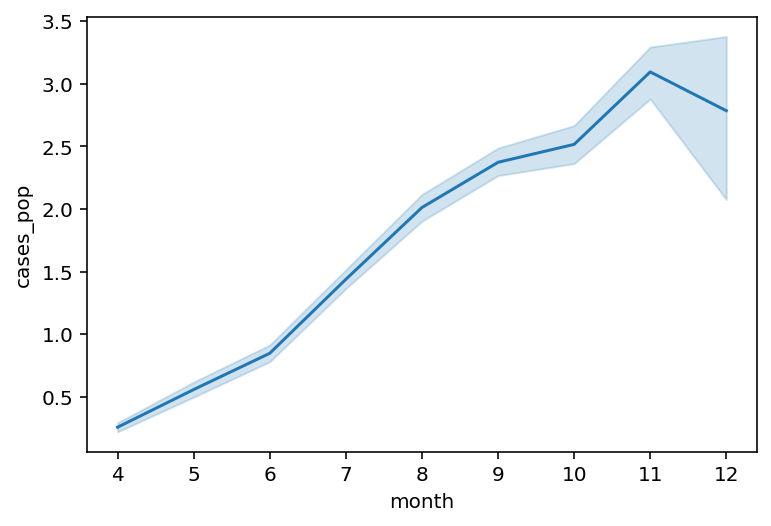

In [16]:
# cases as a whole (April-December).
sns.lineplot(x = 'month', 
             y = 'cases_pop',  
             data = filtered_data)

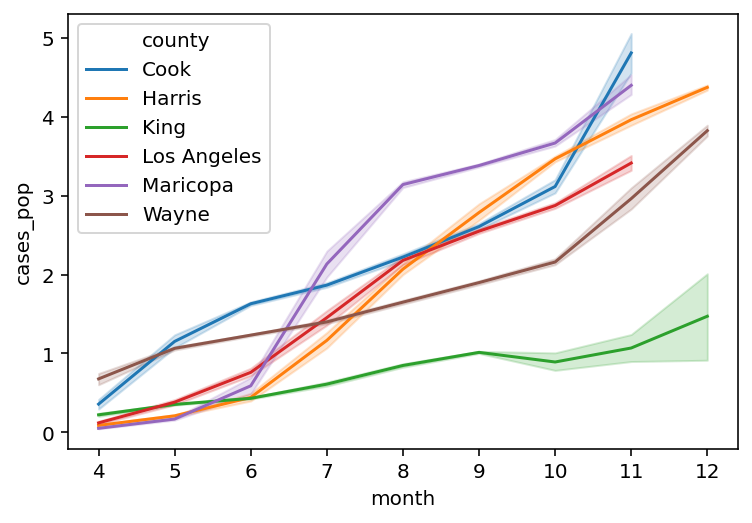

In [17]:
# cases in each county (April-December).
sns.lineplot(x = 'month', 
             y = 'cases_pop', 
             hue = 'county',
             data = filtered_data)

# Comparing Temperature and Cases Over Time

Using the same three subsets from Comparing Means, we compared the cases per population (cases_pop) and the temperature (mean_temp) of each climate zone during April-December 2020. For this section, side-by-side lineplots were used for each climate zone to visualize the change in both variables. We thought providing a temporal visual comparison would help put these variables into perspective, instead of solely focusing on means or distributions of the two variables. Additionally, a side-by-side visual of the changes in both variables is useful in analyzing if there is an actual trend occuring. The left lineplot shows the cases per population over the time period April-December 2020. The right lineplot shows the change in temperature over the time period April-December 2020. 

From the lineplots rendered, it does not look like there is a correlation between cases per population and temperature of each climate zone. Cases per population is, for the most part, on an increasing trend, whereas mean temp is parabolic (first increasing, then decreasing). This could, however, be impacted by the length time, itself. The increase in cases from April through December, despite temperature rising and falling, may be due to an increase in length of exposure to the COVID-19 virus for each population. Naturally, exposure over time, will cause cases to increase. 

Further analysis is needed. Linear regression models could help to unveil if there is a true correlation between temperature and cases in each climate zone. If time is held constant, this may reveal a correlation between temperature and cases.

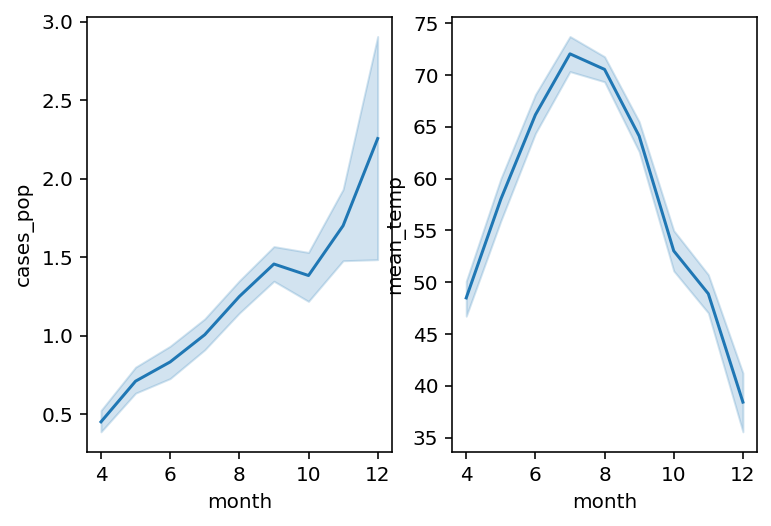

In [18]:
# side-by-side lineplots comparing mean temp(April-December) and cases(April-December) 
# for Moist Continental Mid-Latitude Climates.
plt.subplot(1, 2, 1)
sns.lineplot(x = 'month', 
             y = 'cases_pop', 
             data = continental_df)

plt.subplot(1, 2, 2)
sns.lineplot(x = 'month', 
             y = 'mean_temp', 
             data = continental_df)


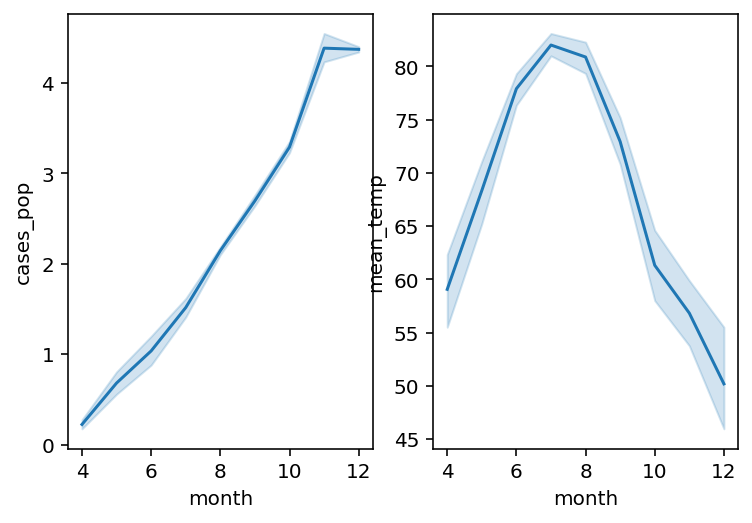

In [19]:
# side-by-side lineplots comparing mean temp(April-December) and cases(April-December) 
# for Moist Subtropical Mid-Latitude Climates.
plt.subplot(1, 2, 1)
sns.lineplot(x = 'month', 
             y = 'cases_pop', 
             data = subtropic_df)

plt.subplot(1, 2, 2)
sns.lineplot(x = 'month', 
             y = 'mean_temp', 
             data = subtropic_df)

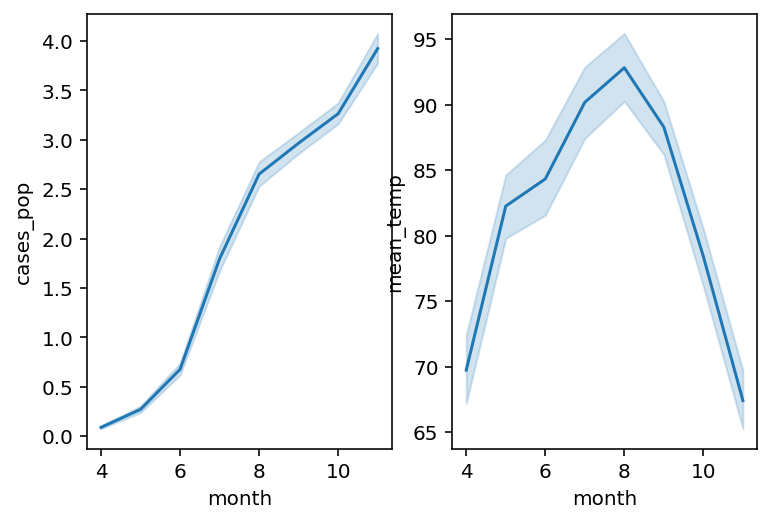

In [20]:
# side-by-side lineplots comparing mean temp(April-December) and cases(April-December) 
# for Dry Climates.
plt.subplot(1, 2, 1)
sns.lineplot(x = 'month', 
             y = 'cases_pop', 
             data = dry_df)

plt.subplot(1, 2, 2)
sns.lineplot(x = 'month', 
             y = 'mean_temp', 
             data = dry_df)


# Regression

In [21]:
# OLS Regression Analysis of mean_temp and month on cases_pop

outcome, predictors = patsy.dmatrices('cases_pop ~ mean_temp + month', filtered_data)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              cases_pop   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     1068.
Date:                Sun, 14 Mar 2021   Prob (F-statistic):          8.36e-290
Time:                        20:10:57   Log-Likelihood:                -1846.2
No. Observations:                1513   AIC:                             3698.
Df Residuals:                    1510   BIC:                             3714.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4138      0.126    -19.145      0.0

In [22]:
# OLS Regression Analysis of mean_temp and total_population on cases_pop

outcome, predictors = patsy.dmatrices('cases_pop ~ mean_temp + total_population', filtered_data)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              cases_pop   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     21.81
Date:                Sun, 14 Mar 2021   Prob (F-statistic):           4.60e-10
Time:                        20:10:58   Log-Likelihood:                -2491.6
No. Observations:                1513   AIC:                             4989.
Df Residuals:                    1510   BIC:                             5005.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.4158      0.144  

Analyzing the above regression models, both variables have a p-value of less than .01, meaning that both factors are statistically significant to the increase in COVID-19 cases per population. Holding both mean_temp and month constant, we see a -2.4138 unit decrease in cases_pop (in thousands). Because the trend in COVID-19 cases per population decreases at a rate of -2.4138 when temperature and month are held constant, both variables have a strong impact on COVID-19 cases per population, taking the trend from a rapid decrease to a significant increase. However, analyzing these variables individually, reveals that month has a stronger impact on the increase in COVID-19 cases. Holding mean_temp constant per every one month increase, there is a 0.4209 increase in cases_pop (in thousands). Holding month constant for each degree increase in mean_temp, we see a 0.0127 increase in cases_pop (in thousands). This may explain why the above plots comparing do not show an obvious correlation between mean_temp and cases_pop. Additionally, other variables may be in play, as has been seen in prior research.

Therefore, we decided to do a regression analysis of mean_temp with another variable. The second regression analysis we did was to test the relationship of total_population and mean_temp on cases_pop, since population density is cited in prior research as having an impact on COVID-19 cases. However, when running the analysis, there was strong multicollinearity probably due to total population and cases per population (cases_pop) being very similar. Therefore, we were unable to use this regression in our analysis. We still think that population might be a strong predictor, based on previous research studies. However, further research is needed to confirm this. 

# Ethics & Privacy

There are very few privacy and ethics concerns that may be associated with this project. This is because all of the data that is used in this project was collected from public repositories. For example, all counties must report their covid data, which is then published online for everybody to see. The same can be said about the temperature. Geostations often record and report temperature online, which is then posted online.

# Conclusion & Discussion

Our research focused on analyzing whether weather trends within the US shared a correlation with trends in coronavirus cases within a population to investigate the impact of temperature on the spread of the virus. Our team initially hypothesized that lower temperature climates would not have a positive relationship with COVID cases per population. Previously published research maintained that colder temperatures do not have a positive correlation with the number of coronavirus cases per population but rather any positive correlation likely points to a third variable such as differences in population density, regulationations and policies, or the access/quality of public health facilities by county. Reputable articles also claimed that cold weather (and cold weather months) brought upon weakened immune systems, increased holiday travel, and the increased tendency of people to want to gather in enclosed areas. 
To analyze whether or not colder temperatures related to an increase in COVID-19 cases, we used side-by-side line plots to compare temperature and cases per population of each climate region and found that there was no significant relationship between temperature and cases per population because we see that cases per population seems to continue to increase with the function of time, whereas temperature is parabolic. 
To analyze the relationship of these variables further, we also used OLS regression analyses of mean temperature and cases per population to study the strength between climate and cases per population. Initially, both variables showed that they were statistically significant factors to the increase in Covid-19 cases per population; However, after analyzing the impact of temperature and month individually on cases per population, we see that month has a greater impact than temperature on the increase of coronavirus cases. This indicates that there is no significant relationship between temperature and the increase of Covid cases and that there may be other variables at play. 

The implications of our findings are important for society because at the beginning of COVID-19 lockdown, there were many misconceptions about there being a second wave of the virus due to seasonal temperature tendencies across the country. Many mistakenly assume that escaping to different climate zones would result in also escaping the virus, but as we see in our research, temperature did not have a significant effect on the increase of Covid cases by county and climate zone.


# Team Contributions

- Brandon Wettenstein (A15114259): Coded the datacleaning methods with Lily and Timothy, set up the weekly zoom calls, helped Shehnaya write the relationship between variables section, coded the graphs in the relationship between varables section, did the relationship between variables section in our video

- Lillian Wood (A15468781): Found dataset, wrote Background & Prior Work, wrote hypothesis, Helped with set-up and data-cleaning (mostly Brandon's work), wrote code for describing the dataset in Data Analysis & Results, coded and wrote analysis for Comparing Means, coded histograms and scatterplots for Moist Continental Mid-Latitude Climates, coded lineplots comparing all counties we studied, coded and wrote analysis for Comparing Temperature and Cases Over Time, coded and wrote analysis of both regression models 


- Timothy Tran (A15401253): Helped with datacleaning, hypothesis, did ethics and privacy, and created the final video for the project

- Shehnaya Johal (A16096492): Worked on coming up with research question, helped formulate hypothesis, code for null values, worked on code and write-up of Relationship between Variables with Brandon, conclusion, final proofreading/editing, regression analysis + conclusion summary in video. 

